### This file runs the GEAGS Effective Model (Paper Section 4)

The equations used in this model can be found in the SI (equations S39 - S44)

In [ ]:
## Import all the required packages here

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import lmfit 

# Import the effective model file 
from model_equations.effective_model_equations import run_model

In [2]:
# Import experimental data

geags_data = pd.read_csv("experiment_data/exp_data_2.csv")
time = geags_data["Time (min)"].to_numpy()
A1 = geags_data["A1"].to_numpy()
A2 = geags_data["A2"].to_numpy()
A3 = geags_data["A3"].to_numpy()
B1 = geags_data["B1"].to_numpy()
B2 = geags_data["B2"].to_numpy()
B3 = geags_data["B3"].to_numpy()

A12 = A1 - A1[0]
A1_non_leaky = A12[np.argwhere(A12 >= 0)]
t12 = time[len(A1_non_leaky) - 1]
time12 = np.linspace(0,t12,len(A1_non_leaky))

A22 = A2 - A2[0]
A2_non_leaky = A22[np.argwhere(A22 >= 0)]
t22 = time[len(A2_non_leaky) - 1]
time22 = np.linspace(0,t22,len(A2_non_leaky))

A32 = A3 - A3[0]
A3_non_leaky = A32[np.argwhere(A32 >= 0)]
t32 = time[len(A3_non_leaky) - 1]
time32 = np.linspace(0,t32,len(A3_non_leaky))

B12 = B1 - B1[0]
B1_non_leaky = B12[np.argwhere(B12 >= 0)]
tB12 = time[len(B1_non_leaky) - 1]
timeB12 = np.linspace(0,tB12,len(B1_non_leaky))

B22 = B2 - B2[0]
B2_non_leaky = B22[np.argwhere(B22 >= 0)]
tB22 = time[len(B2_non_leaky) - 1]
timeB22 = np.linspace(0,tB22,len(B2_non_leaky))

B32 = B3 - B3[0]
B3_non_leaky = B32[np.argwhere(B32 >= 0)]
tB32 = time[len(B3_non_leaky) - 1]
timeB32 = np.linspace(0,tB32,len(B3_non_leaky))

A_avg = (A1_non_leaky[:88] + A2_non_leaky[:88] + A3_non_leaky[:88])/3
A_avg_max = np.max(A_avg)
B_avg = (B1_non_leaky[:88] + B2_non_leaky[:88] + B3_non_leaky[:88])/3
avg_fold_change = np.mean((np.max(B1_non_leaky)/np.max(A1_non_leaky),np.max(B2_non_leaky)/np.max(A2_non_leaky),np.max(B3_non_leaky)/np.max(A3_non_leaky)))

In [3]:
# Import growth data

OD_data = pd.read_csv("experiment_data/exp_growth_data.csv")
time = OD_data["time(min)"].to_numpy()
OD_blank = 0.078*1
A1 = OD_data["A1"].to_numpy() - OD_blank
A2 = OD_data["A2"].to_numpy() - OD_blank
A3 = OD_data["A3"].to_numpy() - OD_blank
B1 = OD_data["B1"].to_numpy() - OD_blank
B2 = OD_data["B2"].to_numpy() - OD_blank
B3 = OD_data["B3"].to_numpy() - OD_blank

tf_I = 72

C_OD = 1e9
C1 = A1 * C_OD
C2 = A2 * C_OD
C3 = A3 * C_OD
C4 = B1 * C_OD
C5 = B2 * C_OD
C6 = B3 * C_OD

C1_max = np.max(C1)
C2_max = np.max(C2)
C3_max = np.max(C3)
C4_max = np.max(C4)
C5_max = np.max(C5)
C6_max = np.max(C6)
C_max = [C1_max, C2_max, C3_max, C4_max, C5_max, C6_max]

C1_0 = np.min(C1)
C2_0 = np.min(C2)
C3_0 = np.min(C3)
C4_0 = np.min(C4)
C5_0 = np.min(C5)
C6_0 = np.min(C6)
C_0 = [C1_0, C2_0, C3_0, C4_0, C5_0, C6_0]

k_gr = [0.01692117, 0.01527194, 0.01514989, 0.01656997, 0.01770599,
       0.01571999]
k_gr1 = k_gr[0]
k_gr2 = k_gr[1]
k_gr3 = k_gr[2]
k_gr4 = k_gr[3]
k_gr5 = k_gr[4]
k_gr6 = k_gr[5]

C_max_avg = np.mean(C_max[:3])
C_0_avg = np.mean(C_0[:3])
k_gr_avg = np.mean(k_gr[:3])

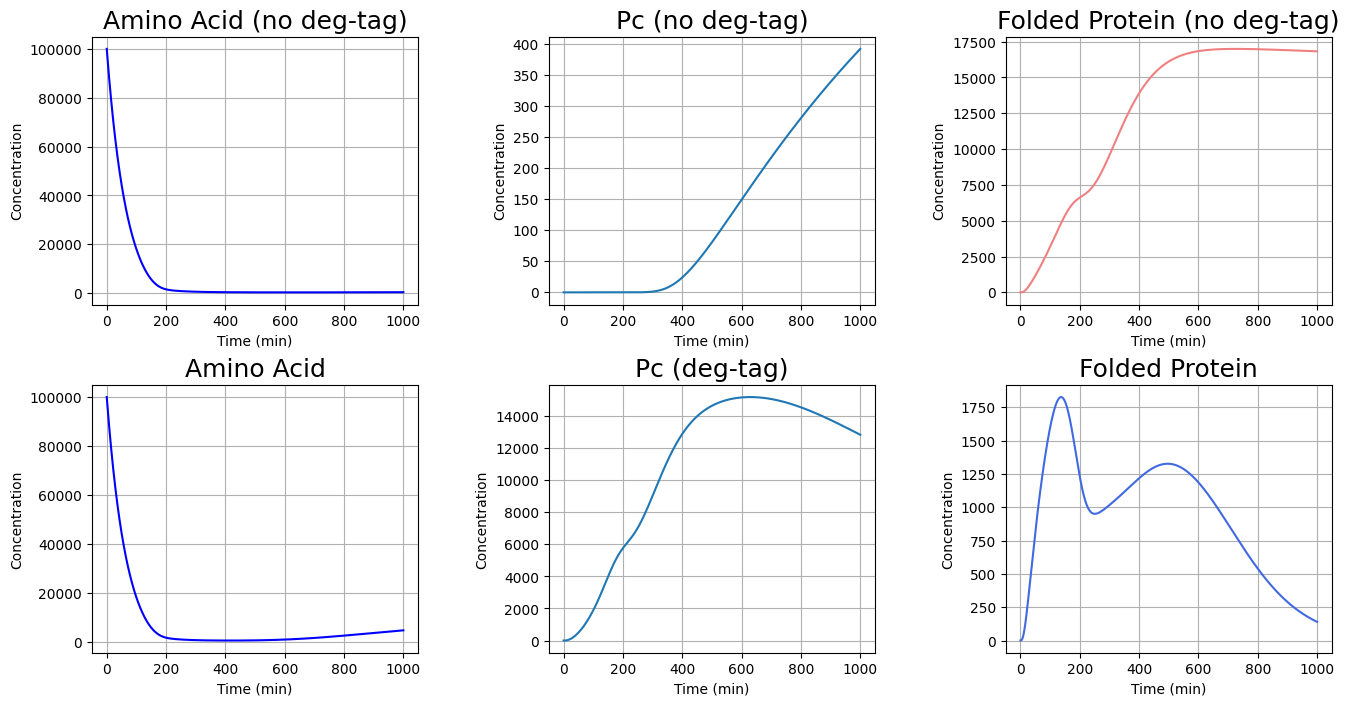

In [4]:
## Run the model by using the function imported from the model file

N_steps = 1000
t_final = 1000
time = np.linspace(0, t_final, N_steps)

tf_i = 720 # indice for 720 mins 

# Load the parameters
p = pd.read_csv("model_parameters/effective_model_param_file.csv").to_numpy()
p = p[:,2]

# I have used the package LFMIT to load the parameters so that they are loaded as 
# instances of the parameter object "params". This object can be directly loaded into the 
# parameter estimation suite of LMFIT, if needed, otherwise it is just used as a means to load parameters.
# I have commented out the bounds on the parameters just for hand-tuning purpose. 
params = lmfit.Parameters()
params.add(name = 'k_tx', value = p[0])# , min = 0.1, max = 1, vary = True)
params.add(name = 'd_m', value = p[1])# , min = 0.05, max = 0.4, vary = True)
params.add(name = 'k_tl', value = p[2])# , min = 1e-4, max = 1, vary = True)
params.add(name = 'd_tag', value = p[3])#, min = 0.05, max = 0.3, vary = True)
params.add(name = 'b_tag', value = p[4])#, min = 0.01, max = 1, vary = True)
params.add(name = 'd_p', value = p[5])#, min = 0.0001, max = 0.01, vary = True)
params.add(name = 'k_fold', value = p[6])#, min = 0.1, max = 0.3, vary = True)
params.add(name = 'b_fold', value = p[7])#, min = 0.5, max = 1, vary = 1)
params.add(name = 'k_syn', value = p[8])# , min = 10, max = 2e3, vary = True)
params.add(name = 'k_lag', value = p[9])#, min = 0.001, max = 1, vary = True)
params.add(name = 'A_0', value = p[10]*1)#, min = 1000, max = 200000, vary = True)
params.add(name = 'n_gamma', value = p[11])#, min = 0, max = 1, vary = True)



params.add(name = 'C_max', value = p[12], vary = 0)
params.add(name = "C_0", value = p[13], vary = 0)
params.add(name = "k_gr", value = p[14], vary = 0)


# Run the model and obtain the solution. Pass argument degtag = 1 if you have degtag, 0 otherwise
sol_deg = run_model(param = params, degtag = 1,tspan = time)
sol_no_deg = run_model(param = params, degtag = 0,tspan = time)

# Plot the simulation results 
fig, axs = plt.subplots(2, 3, figsize = (16,8))
fig.subplots_adjust(wspace = 0.4, hspace = 0.3)

r,c = 0,0
#axs[r,c].plot(time[200:600], sol_no_deg[200:600,4], label = "Amino Acid", color = 'blue')
axs[r,c].plot(time, sol_no_deg[:,4], label = "Amino Acid", color = 'blue')
axs[r,c].set_title('Amino Acid (no deg-tag)', fontsize = 18)
axs[r,c].grid(True)

r,c = 0,2
axs[r,c].plot(time, sol_no_deg[:,2], label = "Folded Protein", color = 'lightcoral')
axs[r,c].set_title('Folded Protein (no deg-tag)', fontsize = 18)
axs[r,c].grid(True)

r,c = 1,0
#axs[r,c].plot(time[200:600], sol_deg[200:600,4], label = "Amino Acid", color = 'blue')
axs[r,c].plot(time, sol_deg[:,4], label = "Amino Acid", color = 'blue')
axs[r,c].set_title('Amino Acid', fontsize = 18)
axs[r,c].grid(True)


r,c = 1,2
axs[r,c].plot(time, sol_deg[:,2], label = "Folded Protein", color = 'royalblue')
axs[r,c].set_title('Folded Protein', fontsize = 18)
axs[r,c].grid(True)

r,c = 0,1
axs[r,c].plot(time, sol_no_deg[:,3], label = "Pc")
axs[r,c].set_title('Pc (no deg-tag)', fontsize = 18)
axs[r,c].grid(True)

r,c = 1,1
axs[r,c].plot(time, sol_deg[:,3], label = "Pc")
axs[r,c].set_title('Pc (deg-tag)', fontsize = 18)
axs[r,c].grid(True)

for ax in axs.flat:
    ax.set(xlabel = 'Time (min)', ylabel = 'Concentration')

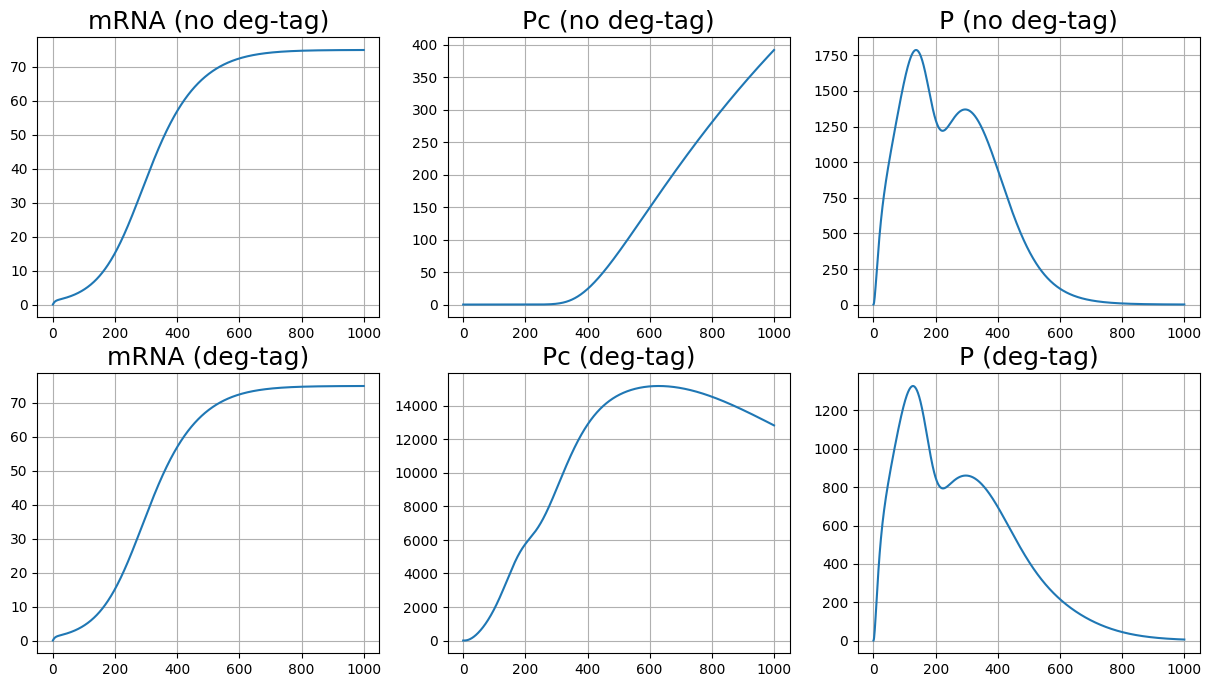

In [5]:
# Plotting continuation

fig, ax = plt.subplots(2,3, figsize = (15,8))

r,c = 0,0
ax[r,c].plot(time, sol_no_deg[:,0], label = "mRNA")
ax[r,c].set_title('mRNA (no deg-tag)', fontsize = 18)
ax[r,c].grid(True)

r,c = 1,0
ax[r,c].plot(time, sol_deg[:,0], label = "mRNA")
ax[r,c].set_title('mRNA (deg-tag)', fontsize = 18)
ax[r,c].grid(True)

r,c = 0,1
ax[r,c].plot(time, sol_no_deg[:,3], label = "Pc")
ax[r,c].set_title('Pc (no deg-tag)', fontsize = 18)
ax[r,c].grid(True)

r,c = 1,1
ax[r,c].plot(time, sol_deg[:,3], label = "Pc")
ax[r,c].set_title('Pc (deg-tag)', fontsize = 18)
ax[r,c].grid(True)

r,c = 0,2
ax[r,c].plot(time, sol_no_deg[:,1], label = "P")
ax[r,c].set_title('P (no deg-tag)', fontsize = 18)
ax[r,c].grid(True)

r,c = 1,2
ax[r,c].plot(time, sol_deg[:,1], label = "P")
ax[r,c].set_title('P (deg-tag)', fontsize = 18)
ax[r,c].grid(True)



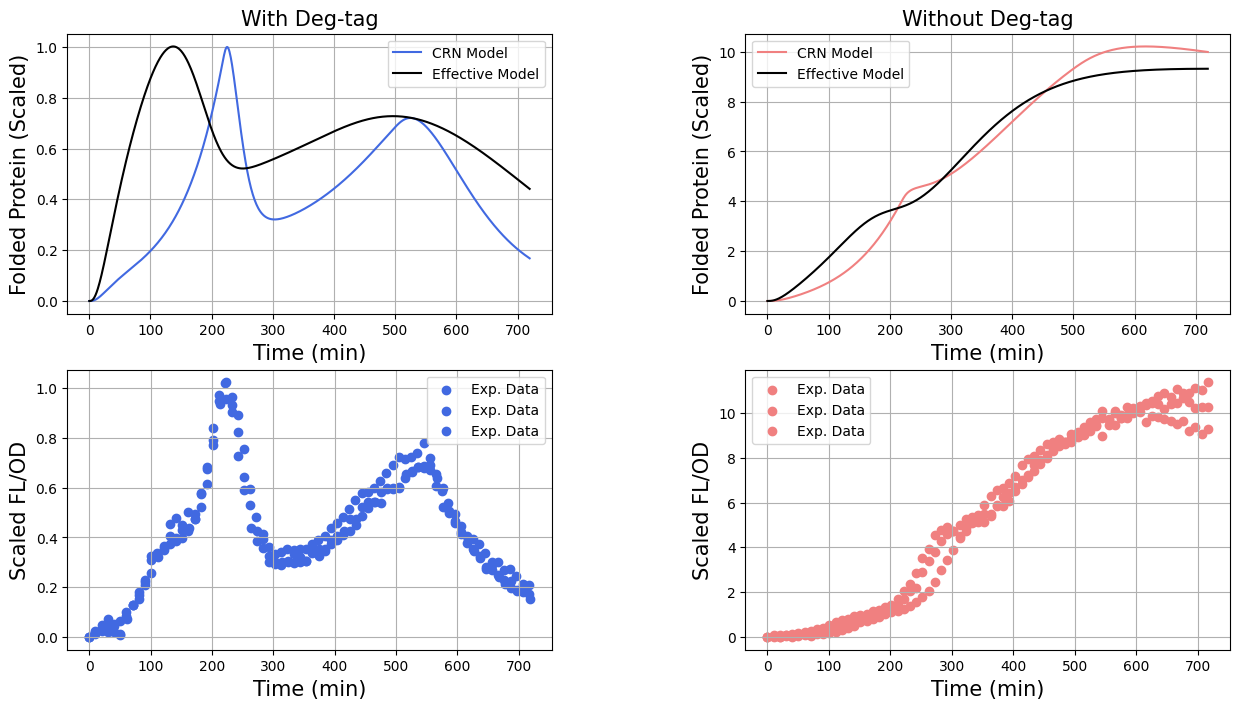

In [6]:
# Compare effective model with the CRN simulation
# Import the CRN run data

sol_deg_crn = pd.read_csv('simulation_run_data/CRN_simulation_run_data_720min_deg_tag_030725.csv')
sol_no_deg_crn = pd.read_csv('simulation_run_data/CRN_simulation_run_data_720min_no_deg_tag_030725.csv')

fig, ax = plt.subplots(2,2, figsize = (15,8))
fig.subplots_adjust(wspace = 0.4)#, hspace = 0.1)

r,c = 0,0
ax[r,c].plot(time[:tf_i], sol_deg_crn['Folded_protein'][:tf_i]/np.max(sol_deg_crn['Folded_protein']), label = "CRN Model", color = 'royalblue')
ax[r,c].plot(time[:tf_i], sol_deg[:,2][:tf_i]/np.max(sol_deg_crn['Folded_protein']), label = "Effective Model", color = 'black')
ax[r,c].set_xlabel('Time (min)', fontsize = 15) ; ax[r,c].set_ylabel('Folded Protein (Scaled)', fontsize = 15) 
ax[r,c].set_title('With Deg-tag', fontsize = 15) ; ax[r,c].grid(True) ; ax[r,c].legend()

r,c = 0,1
ax[r,c].plot(time[:tf_i], sol_no_deg_crn['Folded_protein'][:tf_i]/np.max(sol_deg_crn['Folded_protein']), label = "CRN Model", color = 'lightcoral')
ax[r,c].plot(time[:tf_i], sol_no_deg[:,2][:tf_i]/np.max(sol_deg_crn['Folded_protein']), label = "Effective Model", color = 'black')
ax[r,c].set_xlabel('Time (min)', fontsize = 15) ; ax[r,c].set_ylabel('Folded Protein (Scaled)', fontsize = 15) 
ax[r,c].set_title('Without Deg-tag', fontsize = 15) ; ax[r,c].grid(True) ; ax[r,c].legend()

r,c = 1,0
ax[r,c].scatter(time12[:tf_I], A1_non_leaky[:tf_I]/A_avg_max, color = 'royalblue', label = 'Exp. Data')
ax[r,c].scatter(time22[:tf_I], A2_non_leaky[:tf_I]/A_avg_max, color = 'royalblue', label = 'Exp. Data')
ax[r,c].scatter(time32[:tf_I], A3_non_leaky[:tf_I]/A_avg_max, color = 'royalblue', label = 'Exp. Data')
ax[r,c].set_xlabel('Time (min)', fontsize = 15) ; ax[r,c].set_ylabel('Scaled FL/OD', fontsize = 15) ; ax[r,c].legend()
#ax[r,c].set_title('With Deg-tag') ; 
ax[r,c].grid(True)

r,c = 1,1
ax[r,c].scatter(timeB12[:tf_I], B1_non_leaky[:tf_I]/A_avg_max, color = 'lightcoral', label = 'Exp. Data')
ax[r,c].scatter(timeB22[:tf_I], B2_non_leaky[:tf_I]/A_avg_max, color = 'lightcoral', label = 'Exp. Data')
ax[r,c].scatter(timeB32[:tf_I], B3_non_leaky[:tf_I]/A_avg_max, color = 'lightcoral', label = 'Exp. Data')
ax[r,c].set_xlabel('Time (min)', fontsize = 15) ; ax[r,c].set_ylabel('Scaled FL/OD', fontsize = 15) ; ax[r,c].legend()
#ax[r,c].set_title('Without Deg-tag') ; 
ax[r,c].grid(True)

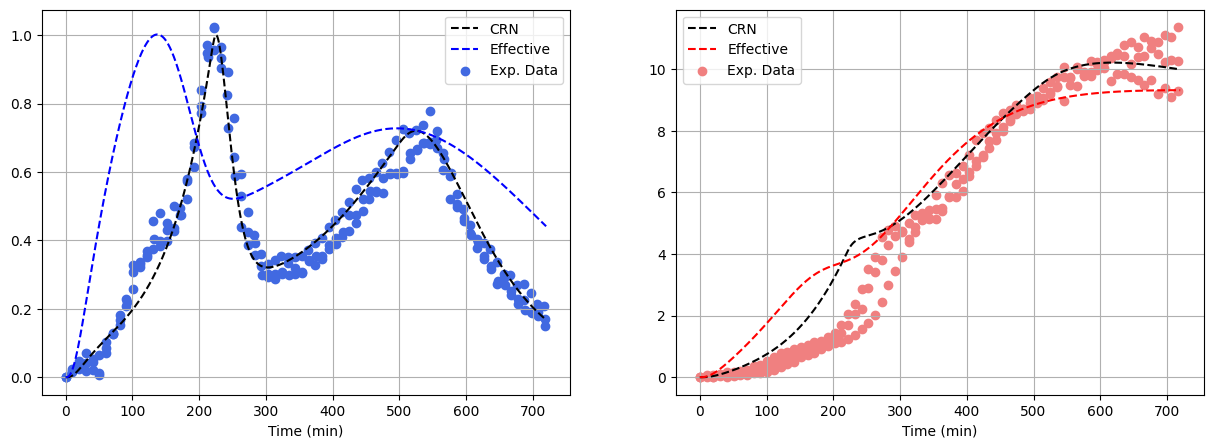

In [7]:
## Compare the scaled Experimental data with the CRN as well as effective model 

fig, ax = plt.subplots(1,2, figsize = (15,5))
#fig, ax = plt.subplots(2,1, figsize = (8,12))

ax[0].plot(time[:tf_i], sol_deg_crn['Folded_protein'][:tf_i]/np.max(sol_deg_crn['Folded_protein']), '--', label = "CRN", color = 'black')
ax[0].plot(time[:tf_i], sol_deg[:,2][:tf_i]/np.max(sol_deg_crn['Folded_protein']), '--', label = "Effective", color = 'blue')
ax[0].scatter(time12[:tf_I], A1_non_leaky[:tf_I]/A_avg_max, color = 'royalblue', label = 'Exp. Data')
ax[0].scatter(time22[:tf_I], A2_non_leaky[:tf_I]/A_avg_max, color = 'royalblue')
ax[0].scatter(time32[:tf_I], A3_non_leaky[:tf_I]/A_avg_max, color = 'royalblue')
ax[0].set_xlabel('Time (min)'); ax[0].grid(True) ; ax[0].legend()

ax[1].plot(time[:tf_i], sol_no_deg_crn['Folded_protein'][:tf_i]/np.max(sol_deg_crn['Folded_protein']), '--', label = "CRN", color = 'black')
ax[1].plot(time[:tf_i], sol_no_deg[:,2][:tf_i]/np.max(sol_deg_crn['Folded_protein']), '--', label = "Effective", color = 'red')
ax[1].scatter(timeB12[:tf_I], B1_non_leaky[:tf_I]/A_avg_max, color = 'lightcoral', label = 'Exp. Data')
ax[1].scatter(timeB22[:tf_I], B2_non_leaky[:tf_I]/A_avg_max, color = 'lightcoral')
ax[1].scatter(timeB32[:tf_I], B3_non_leaky[:tf_I]/A_avg_max, color = 'lightcoral')
ax[1].set_xlabel('Time (min)'); ax[1].grid(True) ; ax[1].legend()

In [8]:
# # Export the run data 

# sol_deg_data_file = pd.DataFrame(sol_deg)
# sol_deg_data_file.to_csv('simulation_run_data/Effective_model_deg_run_data_021325.csv')

# sol_no_deg_data_file = pd.DataFrame(sol_no_deg)
# sol_no_deg_data_file.to_csv('simulation_run_data/Effective_model_no_deg_run_data_021325.csv')

In [9]:
# Visualize and export parameters
# Uncomment the commented part to export the parmeter file as a csv with desired name

param_dict = params.valuesdict()
# param_dict_guess_df = dict()
# param_dict_guess_df['Param name'] = param_dict.keys()
# param_dict_guess_df['Param'] = param_dict.values()
# param_data = pd.DataFrame(data = param_dict_guess_df)
# param_data.to_csv('Effective_model_param_file_021325.csv')
param_dict

{'k_tx': 0.1,
 'd_m': 0.16,
 'k_tl': 0.02,
 'd_tag': 0.173,
 'b_tag': 0.055,
 'd_p': 0.0001,
 'k_fold': 0.1,
 'b_fold': 0.5,
 'k_syn': 410.0,
 'k_lag': 0.00085,
 'A_0': 100000.0,
 'n_gamma': 0.89,
 'C_max': 503666666.7,
 'C_0': 6666666.67,
 'k_gr': 0.015781}